# $k$-Means and MNIST

In this notebook we will investigate whether the $k$-means algorithm can be used to identify clusters in the MNIST dataset that correspond to the digit classes. If you are using your own installation of Jupyter you will need the mnist package which can be installed through anaconda using

conda install -c conda-forge mnist

I must point out that no efforts have been made to optimise this code for either efficiency or elegance, and some of you will no doubt be able to find ways in which it could be improved.

**CAUTION** these notebooks are great, but you must be careful when running the cells out of order, especially if you are using mutable variables

In [1]:
import matplotlib.pyplot as plt
import mnist
import numpy as np
from numpy.linalg import inv, det


First, some manipulations. We need to linearise the training data so that we can treat each image as a vector.

In [2]:
# Get the training and test data
train_set = mnist.train_images()
train_labels = mnist.train_labels()
test_set = mnist.test_images()
test_labels = mnist.test_labels()
print(test_set.shape)
print(train_set.shape)

# Reshape the arrays
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
print(test_set.shape)
print(train_set.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000, 784)
(60000, 784)


## Preprocessing of the data

One problem with the MNIST data is that there are, as we have previously seen, many non-varying pixels around the edge of the images. In LR we do not need to compute the covariance matrix but they risk confounding the classifier so we will remove them.


In [3]:
# Get the sum of each variable into a single vector
S = np.sum(train_set,axis=0).squeeze()

# Define an index of the non-varying and varying pixels
nonvary = S==0
vary = np.array(S!=0).squeeze()

# Choose only the varying pixels in the data
train_set = train_set[:,vary]
test_set = test_set[:,vary]

## Do the clustering with k-means
sklearn's implementation is much more efficient than mine.

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10).fit(test_set)

k-means cannot know how to associate a label with a digit. We can still plot a confusion matrix, but have to interpret it differently.

In [5]:
km.labels_

array([9, 8, 2, ..., 4, 4, 6])

## Evaluating

We compute some evaluation metrics on the outcome (ie the confusion matrix)

In [6]:
def evaluate(predicted_labels, true_labels):
    # Create an empty confusion matrix
    confusion_matrix = np.zeros([10,10])
    
    # For each item in the test set, add it's prediction into the confusion matrix
    for i, l in enumerate(true_labels):
        confusion_matrix[l, predicted_labels[i]] += 1
    
    # Normalise each row
    for i, row in enumerate(confusion_matrix):
        confusion_matrix[i] /= sum(confusion_matrix[i])
        
    # Print the matrix (formatted for copying into a latex document)
    for i,c in enumerate(confusion_matrix):
        print(str(i) + ' & ' + ' & '.join(['{:3.2f}'.format(i) for i in c]) + '\\\\ \hline')

In [7]:
evaluate(km.labels_, test_labels)

0 & 0.01 & 0.00 & 0.00 & 0.83 & 0.02 & 0.06 & 0.02 & 0.00 & 0.06 & 0.00\\ \hline
1 & 0.00 & 0.57 & 0.43 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00\\ \hline
2 & 0.67 & 0.05 & 0.12 & 0.02 & 0.02 & 0.02 & 0.02 & 0.02 & 0.06 & 0.01\\ \hline
3 & 0.05 & 0.06 & 0.00 & 0.00 & 0.01 & 0.15 & 0.01 & 0.01 & 0.69 & 0.01\\ \hline
4 & 0.00 & 0.03 & 0.01 & 0.00 & 0.27 & 0.00 & 0.02 & 0.43 & 0.00 & 0.23\\ \hline
5 & 0.01 & 0.04 & 0.02 & 0.01 & 0.17 & 0.36 & 0.01 & 0.04 & 0.31 & 0.03\\ \hline
6 & 0.02 & 0.05 & 0.01 & 0.02 & 0.01 & 0.05 & 0.83 & 0.01 & 0.00 & 0.00\\ \hline
7 & 0.01 & 0.03 & 0.04 & 0.00 & 0.33 & 0.00 & 0.00 & 0.12 & 0.00 & 0.46\\ \hline
8 & 0.01 & 0.03 & 0.04 & 0.01 & 0.08 & 0.58 & 0.01 & 0.02 & 0.19 & 0.03\\ \hline
9 & 0.00 & 0.02 & 0.00 & 0.01 & 0.18 & 0.01 & 0.00 & 0.34 & 0.01 & 0.42\\ \hline


Note that the class label '1' is the maximum label for both classes 7 and 9. This means that we cannot easily relate the class labels to the cluster indices. What we can say is that:


* 83% of 0s are in the same group
* 57% of 1's
* 67% of 2's
* 67% of 3's
* 40% of 4's
* 36% of 5's
* 82% of 6's
* 45% of 7's (with 36% in the group of 1's)
* 58% of 8's
* 45% of 9's (with 29% in the group of 4s)



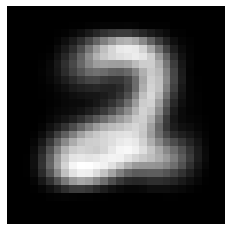

In [ ]:
for i in km.cluster_centers_:
  x = np.zeros(784)
  x[vary] = np.squeeze(i)
  plt.figure()
  plt.imshow(np.reshape(x,(28,28)), cmap='gray')
  plt.axis('off')